# Decision Tree Classifier

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
from sklearn.datasets import load_iris

In [64]:
iris = load_iris()

In [65]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [66]:
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [67]:
x = pd.DataFrame(iris["data"], columns=["sepal length","sepal width","petal length","petal width"])

In [68]:
x

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [69]:
y = iris["target"]

In [70]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42, test_size=0.2)

In [72]:
from sklearn.tree import DecisionTreeClassifier
treeclassifier = DecisionTreeClassifier()

In [73]:
treeclassifier.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.3076923076923077, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 

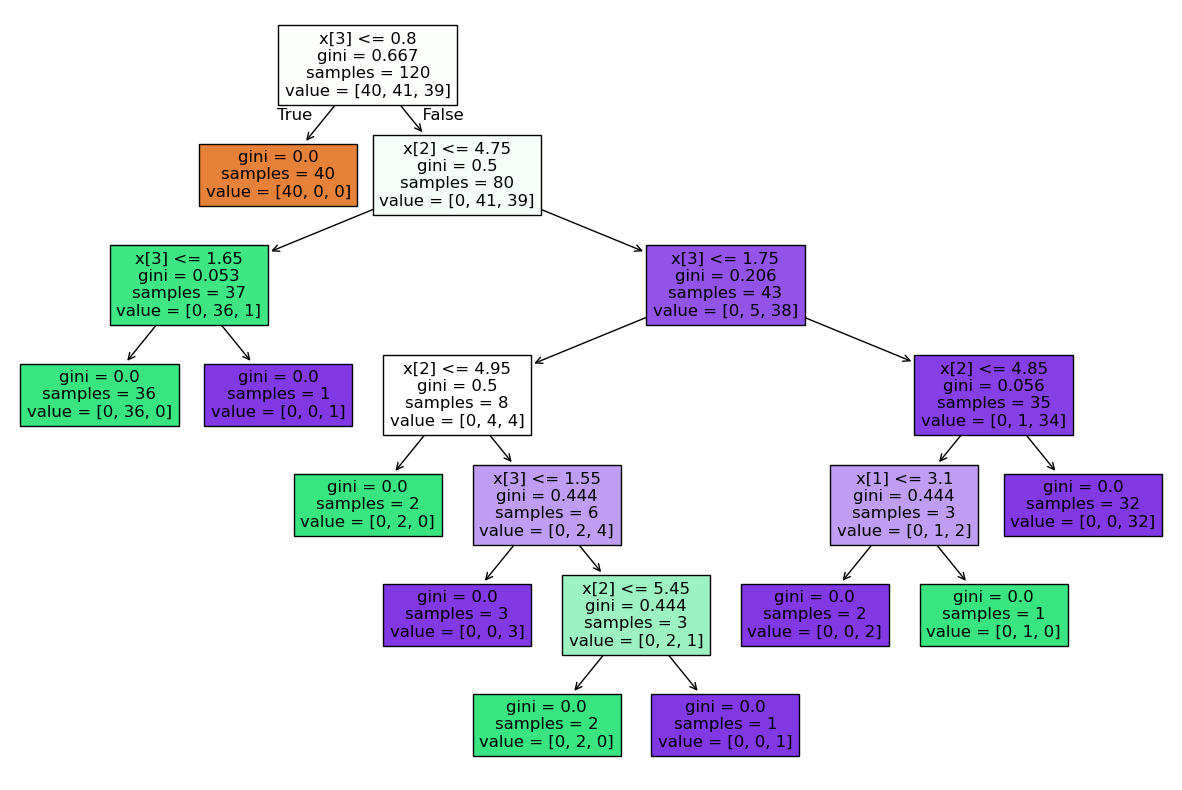

In [74]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier, filled = True)

In [75]:
y_pred = treeclassifier.predict(x_test)

In [76]:
from sklearn.metrics import confusion_matrix, classification_report

In [77]:
cm = confusion_matrix(y_test, y_pred)

In [78]:
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



we can see that the accuracy is 1 thats mean it is overfiited because we taken the entire decision tree thats why we should set up max_depth to prevent this

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



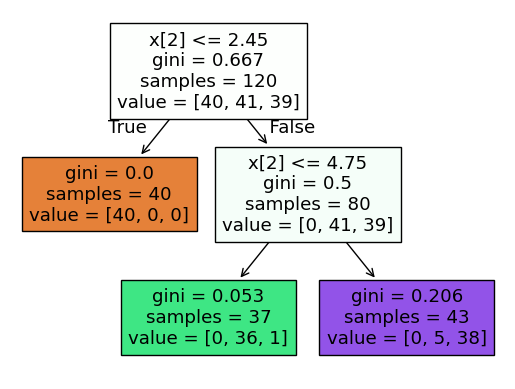

In [80]:
treeclassifier1 = DecisionTreeClassifier(max_depth=2)
treeclassifier1.fit(x_train,y_train)
from sklearn import tree
tree.plot_tree(treeclassifier1, filled = True)
y_pred = treeclassifier1.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



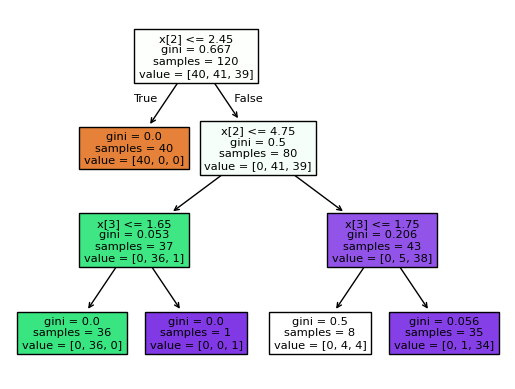

In [81]:
treeclassifier2 = DecisionTreeClassifier(max_depth=3)
treeclassifier2.fit(x_train,y_train)
tree.plot_tree(treeclassifier2, filled = True)
y_pred = treeclassifier2.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

Even with max_depth = 3, we get overfitted decision tree model

In [82]:
from sklearn.datasets import load_wine
wine = load_wine()

In [83]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [84]:
wine["target_names"]

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [85]:
wine["feature_names"]

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [86]:
x = pd.DataFrame(wine["data"], columns=('alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols','proanthocyanins','color_intensity','hue','od280/od315_of_diluted_wines','proline'))

In [87]:
x

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [88]:
y = wine["target"]

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42, test_size=0.2)

In [90]:
wineclassifier = DecisionTreeClassifier()

In [91]:
wineclassifier.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.5, 0.9, 'x[9] <= 3.82\ngini = 0.659\nsamples = 142\nvalue = [45, 57, 40]'),
 Text(0.3, 0.7, 'x[12] <= 1002.5\ngini = 0.109\nsamples = 52\nvalue = [3, 49, 0]'),
 Text(0.4, 0.8, 'True  '),
 Text(0.2, 0.5, 'x[2] <= 3.07\ngini = 0.039\nsamples = 50\nvalue = [1, 49, 0]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 49\nvalue = [0, 49, 0]'),
 Text(0.3, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.4, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.7, 0.7, 'x[6] <= 1.4\ngini = 0.577\nsamples = 90\nvalue = [42, 8, 40]'),
 Text(0.6, 0.8, '  False'),
 Text(0.6, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 40]'),
 Text(0.8, 0.5, 'x[12] <= 724.5\ngini = 0.269\nsamples = 50\nvalue = [42, 8, 0]'),
 Text(0.7, 0.3, 'x[1] <= 3.92\ngini = 0.198\nsamples = 9\nvalue = [1, 8, 0]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 8\nvalue = [0, 8, 0]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]')]

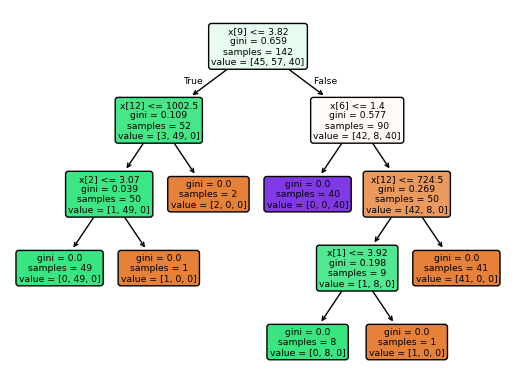

In [92]:
tree.plot_tree(wineclassifier,filled=True, label="all",rounded=True)

In [93]:
y_pred= wineclassifier.predict(x_test)

In [94]:
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[13  0  0]
 [ 1 14  1]
 [ 0  0  7]]


In [95]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.88      0.93        16
           2       0.88      1.00      0.93         7

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.95      0.94      0.94        36



Now with max_depth

[[13  3  1]
 [ 1 11  0]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       0.93      0.76      0.84        17
           1       0.79      0.92      0.85        12
           2       0.88      1.00      0.93         7

    accuracy                           0.86        36
   macro avg       0.86      0.89      0.87        36
weighted avg       0.87      0.86      0.86        36



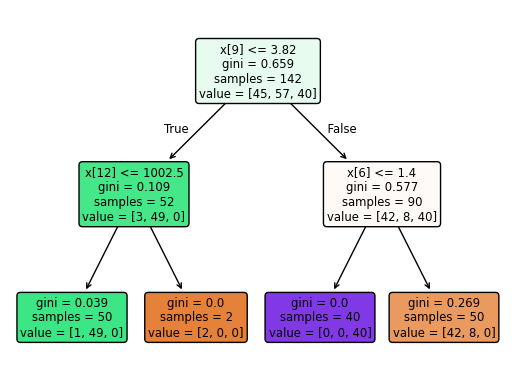

In [96]:
wineclassifier1 = DecisionTreeClassifier(max_depth=2)
wineclassifier1.fit(x_train,y_train)
tree.plot_tree(wineclassifier1,filled=True, label="all",rounded=True)
y_pred= wineclassifier1.predict(x_test)
cm = confusion_matrix(y_pred,y_test)
print(cm)
print(classification_report(y_pred,y_test))


# Decision Tree Classifier Prepruning and Hyperparameter Tuning

In [97]:
param ={
   "criterion":["gini", "entropy", "log_loss"],
   "splitter" : ["best", "random"],
   "max_depth":[1,2,3,4,5],
    "max_features":["auto",'sqrt','log2']
}
from sklearn.model_selection import GridSearchCV
treemodel = DecisionTreeClassifier
grid = GridSearchCV(treeclassifier,param_grid=param, cv=5,scoring="accuracy")
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [98]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [99]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [100]:
grid.best_score_

np.float64(0.9219211822660098)

In [101]:
y_pred = grid.predict(x_test)

In [102]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[13  1  0]
 [ 2 12  0]
 [ 0  2  6]]


In [103]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.80      0.86      0.83        14
           2       1.00      0.75      0.86         8

    accuracy                           0.86        36
   macro avg       0.89      0.85      0.86        36
weighted avg       0.87      0.86      0.86        36



In [104]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)

In [105]:
score

0.8611111111111112

# Diabetes Pridiction Using Decision Tree Regressor

In [106]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [107]:
print(diabetes["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [108]:
print(diabetes['feature_names'])

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [109]:
x = pd.DataFrame(diabetes['data'], columns=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])

In [110]:
x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [111]:
y = diabetes["target"]

In [112]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42,test_size=0.2)

In [115]:
from sklearn.tree import DecisionTreeRegressor

In [116]:
param ={
   "criterion":["squared_error","friedman_mse","absolute_error"],
   "splitter" : ["best", "random"],
   "max_depth":[1,2,3,4,5,10,15,20,25],
    "max_features":["auto",'sqrt','log2']
}
from sklearn.model_selection import GridSearchCV
regressor = DecisionTreeRegressor()
grid = GridSearchCV(regressor,param_grid=param, cv=5,scoring="neg_mean_squared_error")
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [117]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [118]:
bestmodel = grid.best_estimator_

In [119]:
bestmodel

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      max_features='sqrt')

In [120]:
bestmodel.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      max_features='sqrt')

In [121]:
y_pred = bestmodel.predict(x_test)

In [122]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

NameError: name 'r2_score' is not defined

[Text(0.5, 0.875, 'x[2] <= 0.005\nfriedman_mse = 6076.398\nsamples = 353\nvalue = 153.737'),
 Text(0.25, 0.625, 'x[7] <= 0.031\nfriedman_mse = 3612.73\nsamples = 209\nvalue = 118.043'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[8] <= 0.025\nfriedman_mse = 2746.978\nsamples = 164\nvalue = 105.299'),
 Text(0.0625, 0.125, 'friedman_mse = 2275.987\nsamples = 150\nvalue = 98.8'),
 Text(0.1875, 0.125, 'friedman_mse = 2492.495\nsamples = 14\nvalue = 174.929'),
 Text(0.375, 0.375, 'x[7] <= 0.094\nfriedman_mse = 4018.783\nsamples = 45\nvalue = 164.489'),
 Text(0.3125, 0.125, 'friedman_mse = 3610.543\nsamples = 42\nvalue = 157.929'),
 Text(0.4375, 0.125, 'friedman_mse = 696.222\nsamples = 3\nvalue = 256.333'),
 Text(0.75, 0.625, 'x[2] <= 0.073\nfriedman_mse = 5119.262\nsamples = 144\nvalue = 205.542'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[9] <= 0.034\nfriedman_mse = 4557.346\nsamples = 118\nvalue = 191.102'),
 Text(0.5625, 0.125, 'friedman_mse = 4005.619\nsamples = 85

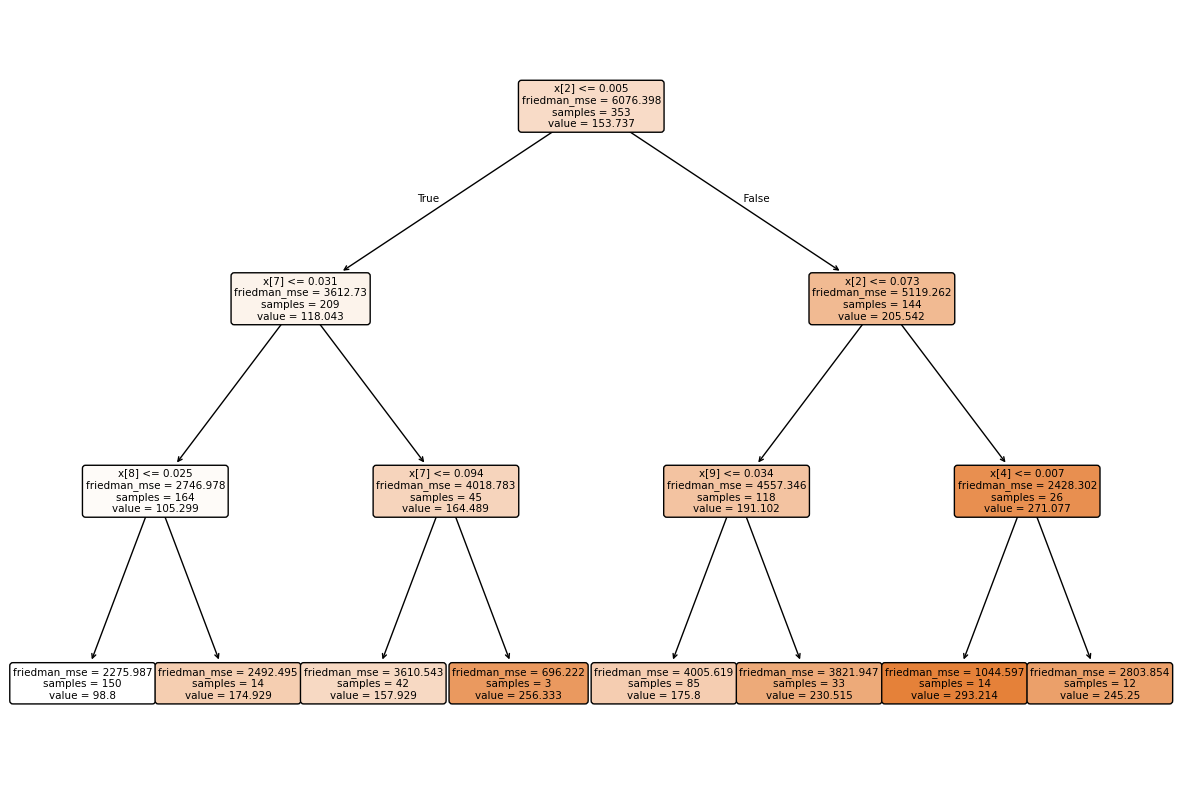

In [70]:
plt.figure(figsize=(15,10))
tree.plot_tree(bestmodel, filled=True,rounded=True)

In [58]:
y_pred = grid.predict(x_test)

In [77]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [60]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))


0.3304674012538914
47.67655527992608
3547.2853087355597


In [61]:
selectmodel = DecisionTreeRegressor(criterion="friedman_mse",max_depth=4,max_features="log2",splitter="random")

In [62]:
selectmodel.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='log2', splitter='random')

[Text(0.4375, 0.9, 'x[3] <= -0.066\nfriedman_mse = 6076.398\nsamples = 353\nvalue = 153.737'),
 Text(0.20833333333333334, 0.7, 'x[7] <= 0.06\nfriedman_mse = 2050.602\nsamples = 25\nvalue = 97.72'),
 Text(0.3229166666666667, 0.8, 'True  '),
 Text(0.16666666666666666, 0.5, 'x[7] <= -0.027\nfriedman_mse = 1750.248\nsamples = 24\nvalue = 93.792'),
 Text(0.08333333333333333, 0.3, 'x[0] <= 0.032\nfriedman_mse = 900.408\nsamples = 14\nvalue = 75.143'),
 Text(0.041666666666666664, 0.1, 'friedman_mse = 770.354\nsamples = 12\nvalue = 70.75'),
 Text(0.125, 0.1, 'friedman_mse = 870.25\nsamples = 2\nvalue = 101.5'),
 Text(0.25, 0.3, 'x[6] <= -0.023\nfriedman_mse = 1771.49\nsamples = 10\nvalue = 119.9'),
 Text(0.20833333333333334, 0.1, 'friedman_mse = 1619.04\nsamples = 5\nvalue = 134.6'),
 Text(0.2916666666666667, 0.1, 'friedman_mse = 1491.76\nsamples = 5\nvalue = 105.2'),
 Text(0.25, 0.5, 'friedman_mse = 0.0\nsamples = 1\nvalue = 192.0'),
 Text(0.6666666666666666, 0.7, 'x[3] <= -0.019\nfriedman_ms

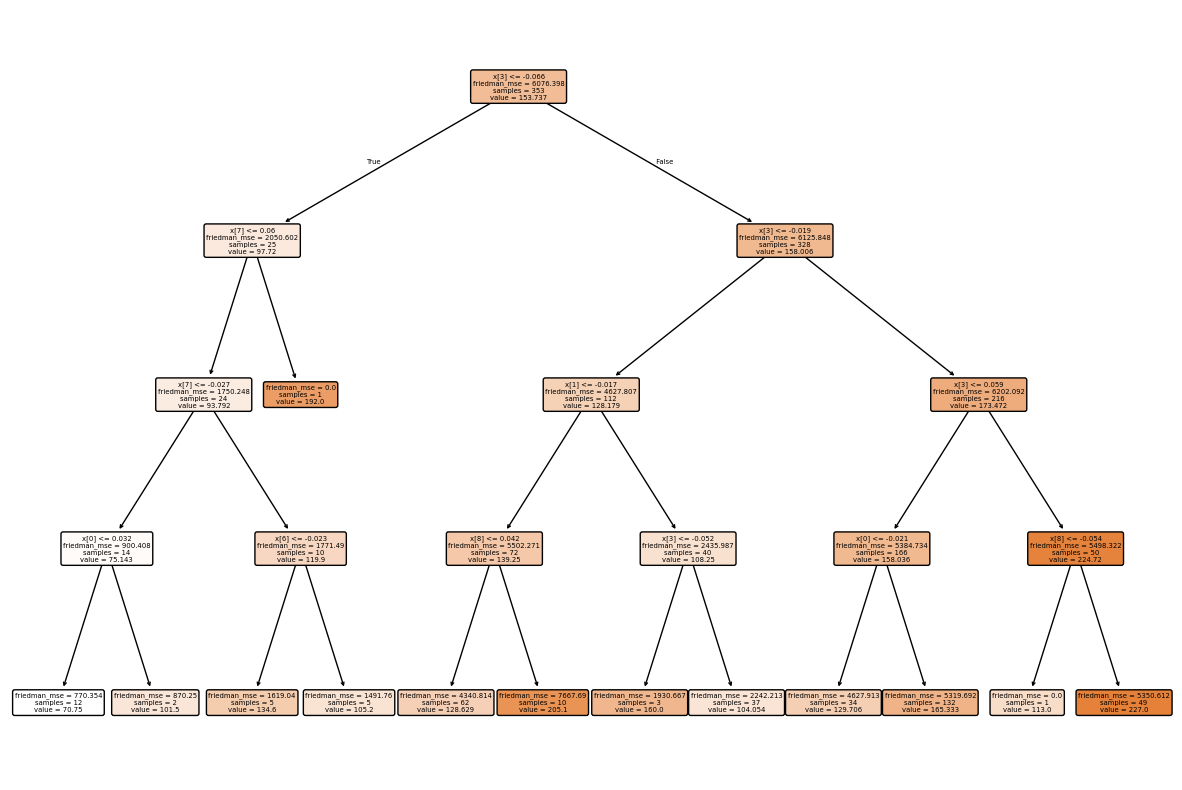

In [64]:
plt.figure(figsize=(15,10))
tree.plot_tree(selectmodel, filled=True,rounded=True)